<a href="https://colab.research.google.com/github/Hrs2690/Harsh_Sahu_Datahack/blob/main/Datahack_Harsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries for doing all the processes

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

**Performing Exploratory Data Analysis**

Reading the training csv files

In [6]:
training_features = pd.read_csv("/content/training_set_features.csv")
training_labels = pd.read_csv("/content/training_set_labels.csv")
# print(training_features.head())
# training_labels.head()
print(training_features.columns,"\n")
print(training_labels.columns)

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object') 

Index(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], dtype='object')


Checking the nan values in each column

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

<Axes: >

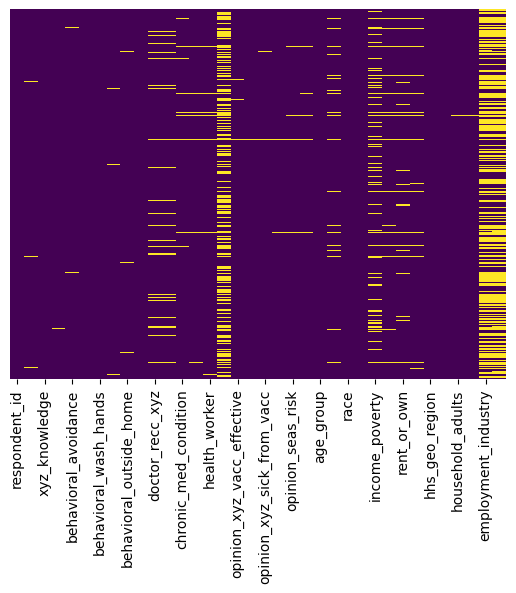

In [7]:
print(training_features.isnull().sum())

Printing first 5 rows of training set

In [8]:
training_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Getting  more info about the training set

In [9]:
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Checking the sns heatmap for better identifying which columns can be dropped

<Axes: >

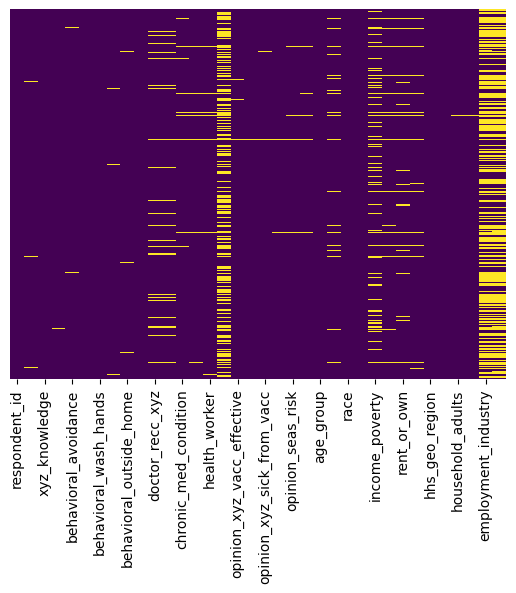

In [11]:
sns.heatmap(training_features.isnull(),yticklabels =False,cbar=False,cmap= 'viridis')

Dropping unnecessary columns

In [12]:
training_features.drop(['employment_industry','employment_occupation','health_insurance'],axis=1, inplace=True)

Replacing the nan values by the most repeated value in columns having binary values

In [14]:
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
               'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
               'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
               'chronic_med_condition', 'child_under_6_months', 'health_worker']

for col in binary_cols:
    training_features[col].fillna(training_features[col].mode()[0], inplace=True)

Replacing the nan values by the median of all other values in the columns having multiple integral or float values.

In [15]:
ordinal_cols = ['xyz_concern', 'xyz_knowledge', 'opinion_xyz_vacc_effective',
                'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
                'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

for col in ordinal_cols:
    training_features[col].fillna(training_features[col].median(), inplace=True)

Replacing the categorical columns with the value which is being repeated the most no. of times i.e. mode of data.

In [16]:
# Categorical Features Imputation
categorical_cols = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']

for col in categorical_cols:
    training_features[col].fillna(training_features[col].mode()[0], inplace=True)

Replacing the columns by the median of data

In [17]:
# Demographic and Household Features Imputation
demo_household_cols = ['household_adults', 'household_children']

for col in demo_household_cols:
    training_features[col].fillna(training_features[col].median(), inplace=True)

again checking the heatmap for looking if any nan value is left to be filled

<Axes: >

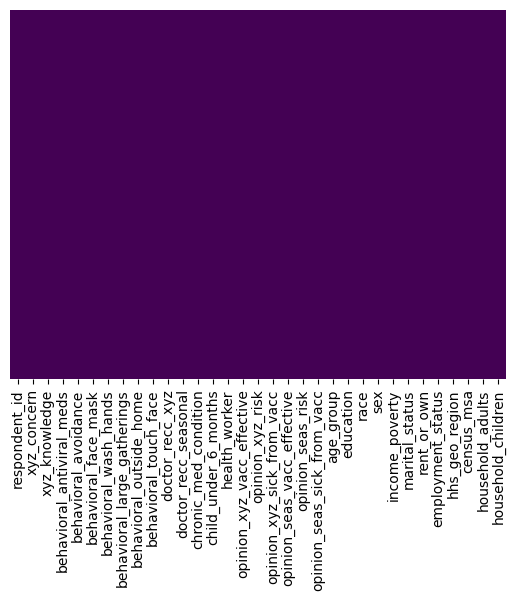

In [18]:
sns.heatmap(training_features.isnull(),yticklabels =False,cbar=False,cmap= 'viridis')

After handling missing values

In [19]:
training_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [26]:
training_features.shape

(26707, 33)

Merging the training set features and labels for training the model

In [28]:
training_data = training_features.merge(training_labels, on='respondent_id')

In [29]:
training_data.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


Doing categorical encoding using scikit learn pipepline for imputing missing values then doing one hot encoding.

In [40]:
# Identify categorical and numerical columns
categorical_cols = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'age_group', 'race', 'sex','hhs_geo_region', 'census_msa']
numerical_cols = training_data.drop(columns=categorical_cols + ['respondent_id', 'xyz_vaccine', 'seasonal_vaccine']).columns.tolist()

# Define the transformers for preprocessing
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


defining X and y for training the data and splitting using scikit learn train_test_split

In [41]:
# Define features and target variables
X = training_data.drop(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], axis=1)
y = training_data[['xyz_vaccine', 'seasonal_vaccine']]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Training data using logistic regression for multi-label output

In [42]:
# Define the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Wrap the model for multi-output classification
multi_target_model = MultiOutputClassifier(logistic_model)

# Create a pipeline that combines the preprocessing and the model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', multi_target_model)])

# Train the model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['xyz_concern',
                                                   'xyz_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_xyz',
                                                   'doctor_recc_season...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'age_group', 'race', 'sex',
                                                   'hhs_geo_region',
                                                   'census_msa'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000)))])

predicting the probabilities for training data using AUC and ROC evaluation method
Got the following values:
ROC AUC for XYZ Vaccine: 0.8266907025019119,
ROC AUC for Seasonal Vaccine: 0.8514691481222907,
Mean ROC AUC: 0.8390799253121013

In [68]:
# predicting the probabilities
y_pred_proba = clf.predict_proba(X_val)

# Extract probabilities for each target variable
y_pred_proba_xyz = y_pred_proba[0][:, 1]
y_pred_proba_seasonal = y_pred_proba[1][:, 1]

# Compute ROC AUC for each target variable
roc_auc_xyz = roc_auc_score(y_val['xyz_vaccine'], y_pred_proba_xyz)
roc_auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], y_pred_proba_seasonal)

# Compute the mean ROC AUC
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2

print(f'ROC AUC for XYZ Vaccine: {roc_auc_xyz}')
print(f'ROC AUC for Seasonal Vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')


ROC AUC for XYZ Vaccine: 0.8266907025019119
ROC AUC for Seasonal Vaccine: 0.8514691481222907
Mean ROC AUC: 0.8390799253121013


Importing the test dataset

In [69]:
test_features = pd.read_csv('/content/test_set_features.csv')

respondent_ids = test_features['respondent_id']

# Drop respondent_id from the features to be processed
test_features = test_features.drop('respondent_id', axis=1)


Applying the same preprocessing technique as done previously for training data.

In [70]:
# Apply the same preprocessing steps to the test data
test_features_transformed = preprocessor.transform(test_features)


Predicting the probabilities of test data in similar way as done previously and then saving the csv file which is named as final_output.csv

In [74]:
# Predict probabilities on the test set
test_predicted_prb = clf.predict_proba(test_features)

# Prepare the submission DataFrame
final_output = pd.DataFrame({
    'respondent_id': respondent_ids,
    'xyz_vaccine': test_predicted_prb[0][:, 1],
    'seasonal_vaccine': test_predicted_prb[1][:, 1]
})

# Save the submission file
final_output.to_csv('final_output.csv', index=False)


In [75]:
print('Succeeded...')

Succeeded...
